In [75]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

### Load Flight Fare Dataset

In [76]:
file_path = '../datasets/US_Airfare.csv'
airfare_data = pd.read_csv(file_path)

Remove potential duplicates

In [77]:
airfare_data.drop_duplicates(inplace=True)

Rename columns for better readability

In [78]:
airfare_data.rename(columns={'quarter': 'Quarter'}, inplace=True)
airfare_data.rename(columns={'citymarketid_1': 'OriginCityId'}, inplace=True)
airfare_data.rename(columns={'citymarketid_2': 'DestinationCityId'}, inplace=True)
airfare_data.rename(columns={'nsmiles': 'Miles'}, inplace=True)
airfare_data.rename(columns={'passengers': 'Passengers'}, inplace=True)
airfare_data.rename(columns={'fare': 'Fare'}, inplace=True)
airfare_data

,Year,Quarter,OriginCityId,DestinationCityId,city1,city2,Miles,Passengers,Fare
0,2021,3,30135,33195,"Allentown/Bethlehem/Easton, PA","Tampa, FL (Metropolitan Area)",970,180,81.43
1,2021,3,30135,33195,"Allentown/Bethlehem/Easton, PA","Tampa, FL (Metropolitan Area)",970,19,208.93
2,2021,3,30140,30194,"Albuquerque, NM","Dallas/Fort Worth, TX",580,204,184.56
3,2021,3,30140,30194,"Albuquerque, NM","Dallas/Fort Worth, TX",580,264,182.64
4,2021,3,30140,30466,"Albuquerque, NM","Phoenix, AZ",328,398,177.11
...,...,...,...,...,...,...,...,...,...
245950,2024,1,35412,31703,"Knoxville, TN","New York City, NY (Metropolitan Area)",665,207,278.70
245951,2024,1,35412,32467,"Knoxville, TN","Miami, FL (Metropolitan Area)",724,277,148.69
245952,2024,1,35412,32467,"Knoxville, TN","Miami, FL (Metropolitan Area)",724,70,330.19
245953,2024,1,35412,33195,"Knoxville, TN","Tampa, FL (Metropolitan Area)",550,178,95.65


Drop city1 and city2 since machine learning models work with numbers

In [79]:
airfare_data.drop(columns=['city1'], inplace=True)
airfare_data.drop(columns=['city2'], inplace=True)
airfare_data

,Year,Quarter,OriginCityId,DestinationCityId,Miles,Passengers,Fare
0,2021,3,30135,33195,970,180,81.43
1,2021,3,30135,33195,970,19,208.93
2,2021,3,30140,30194,580,204,184.56
3,2021,3,30140,30194,580,264,182.64
4,2021,3,30140,30466,328,398,177.11
...,...,...,...,...,...,...,...
245950,2024,1,35412,31703,665,207,278.70
245951,2024,1,35412,32467,724,277,148.69
245952,2024,1,35412,32467,724,70,330.19
245953,2024,1,35412,33195,550,178,95.65


Since OriginCityID and DestinationCityId needs to work as a pair to have any meaning, with combine it into a string

In [80]:
airfare_data['Route'] = airfare_data['OriginCityId'].astype(str) + '-' + airfare_data['DestinationCityId'].astype(str)
airfare_data

,Year,Quarter,OriginCityId,DestinationCityId,Miles,Passengers,Fare,Route
0,2021,3,30135,33195,970,180,81.43,30135-33195
1,2021,3,30135,33195,970,19,208.93,30135-33195
2,2021,3,30140,30194,580,204,184.56,30140-30194
3,2021,3,30140,30194,580,264,182.64,30140-30194
4,2021,3,30140,30466,328,398,177.11,30140-30466
...,...,...,...,...,...,...,...,...
245950,2024,1,35412,31703,665,207,278.70,35412-31703
245951,2024,1,35412,32467,724,277,148.69,35412-32467
245952,2024,1,35412,32467,724,70,330.19,35412-32467
245953,2024,1,35412,33195,550,178,95.65,35412-33195


Then we drop the OriginCityID and DestinationCityId

In [81]:
airfare_data.drop(columns=['OriginCityId'], inplace=True)
airfare_data.drop(columns=['DestinationCityId'], inplace=True)
airfare_data

,Year,Quarter,Miles,Passengers,Fare,Route
0,2021,3,970,180,81.43,30135-33195
1,2021,3,970,19,208.93,30135-33195
2,2021,3,580,204,184.56,30140-30194
3,2021,3,580,264,182.64,30140-30194
4,2021,3,328,398,177.11,30140-30466
...,...,...,...,...,...,...
245950,2024,1,665,207,278.70,35412-31703
245951,2024,1,724,277,148.69,35412-32467
245952,2024,1,724,70,330.19,35412-32467
245953,2024,1,550,178,95.65,35412-33195


However, as indicated above, we also need to encode route string into number

In [82]:
label_encoder = LabelEncoder()

airfare_data['RouteEncoded'] = label_encoder.fit_transform(airfare_data['Route'])
airfare_data.drop(columns=['Route'], inplace=True)
airfare_data

,Year,Quarter,Miles,Passengers,Fare,RouteEncoded
0,2021,3,970,180,81.43,2
1,2021,3,970,19,208.93,2
2,2021,3,580,204,184.56,3
3,2021,3,580,264,182.64,3
4,2021,3,328,398,177.11,4
...,...,...,...,...,...,...
245950,2024,1,665,207,278.70,1262
245951,2024,1,724,277,148.69,1263
245952,2024,1,724,70,330.19,1263
245953,2024,1,550,178,95.65,1265


## Processed Data Visualisation

 - Plot a scatter plot of flight fares vs flight distances

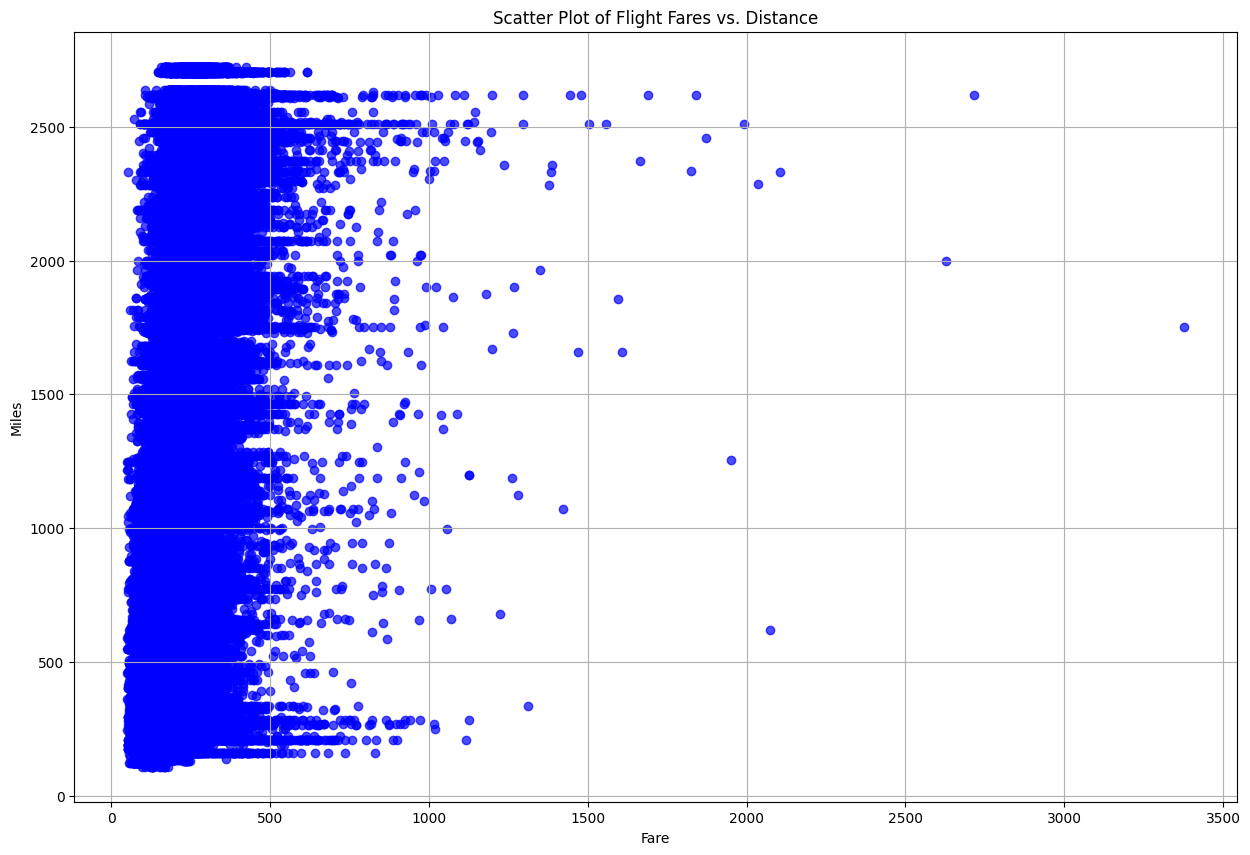

In [88]:
plt.figure(figsize=(15, 10))
plt.scatter(airfare_data['Fare'], airfare_data['Miles'], alpha=0.7, color='b')
plt.title('Scatter Plot of Flight Fares vs. Distance')
plt.xlabel('Fare')
plt.ylabel('Miles')
plt.grid(True)
plt.show()

 - Plot a correlation matrix heatmap

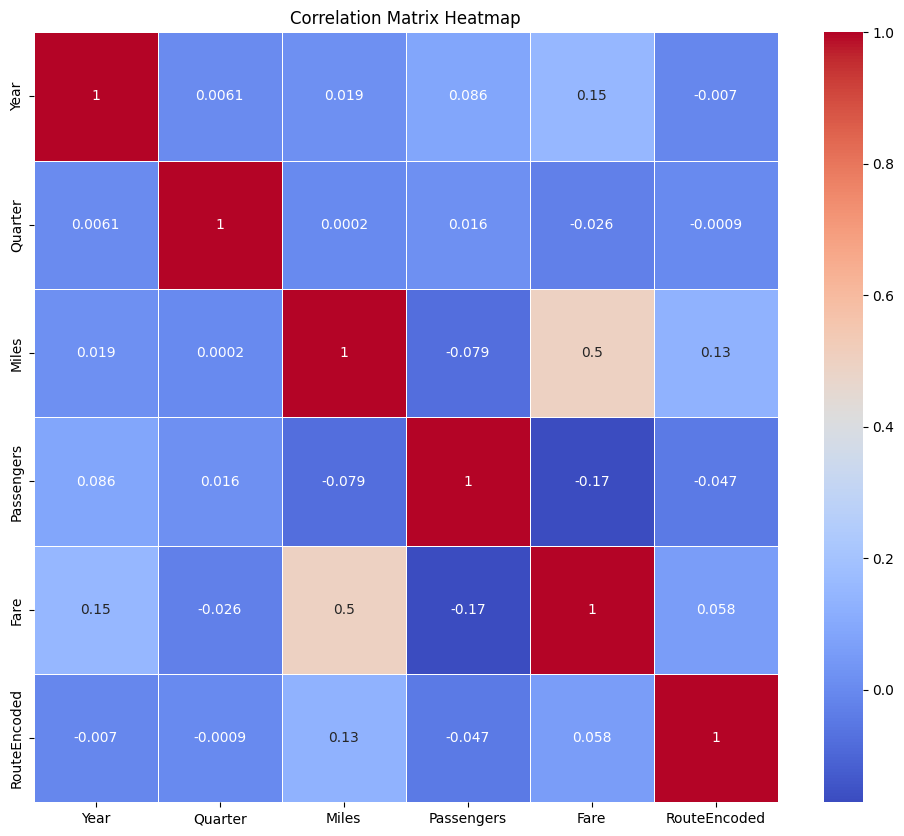

In [85]:
plt.figure(figsize=(12, 10))
corr_matrix = airfare_data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()